In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def visualize_training_stats(encoding_method, graph_type, pooling_layer, num_segments=None):
    model_params = "encoding={},graph_type={}_{}".format(encoding_method, graph_type, pooling_layer)
    if num_segments:
        model_params = model_params + "_{}_num_segments".format(num_segments)
    results_dir = os.path.join(results_base_path, model_params)

    training_stats = pd.read_csv(os.path.join(results_dir, "training_stats.csv"), index_col=0)
    training_stats.set_index("Epoch", inplace=True)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    ax = sns.lineplot(data=training_stats.train_loss, color="g", ax=ax)
    ax.legend(["Training Loss"], loc="upper left")
    ax2 = ax.twinx()
    sns.lineplot(data=training_stats.test_f1_score, color="b", ax=ax2)
    ax2.legend(["Test F1 score"], loc="upper right")
    title = "{}, {} graph".format(encoding_method, graph_type)
    if num_segments:
        title = title + ", {}_num_segments".format(num_segments)
    fig.suptitle(title)
    
    print("Test F1 score is: {}".format(training_stats.loc[training_stats["test_f1_score"].idxmax()]["test_f1_score"]))
    
def visualize_conf_matrix(encoding_method, graph_type, pooling_layer, num_segments=None):
    model_params = "encoding={},graph_type={}".format(encoding_method, graph_type, pooling_layer)
    if num_segments:
        model_params = model_params + "{}_num_segments".format(num_segments)
    
    results_dir = os.path.join(results_base_path, model_params)
    conf_matrix = pd.read_csv(os.path.join(results_dir, "conf_matr.csv"), index_col=0)
    conf_matrix_np = conf_matrix.to_numpy()
    true_pred = np.sum(np.diag(conf_matrix_np))
    total_pred = np.sum(conf_matrix_np)
    
    print("Accuracy: {}".format(true_pred / total_pred))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_np, display_labels=["Non Flooded", "Flooded"])
    disp.plot()
    plt.show()

results_base_path = "C:/Users/results/gnn_flood_detection/"

Test F1 score is: 0.75
Test F1 score is: 0.5909090909090908
Test F1 score is: 0.6829268292682926


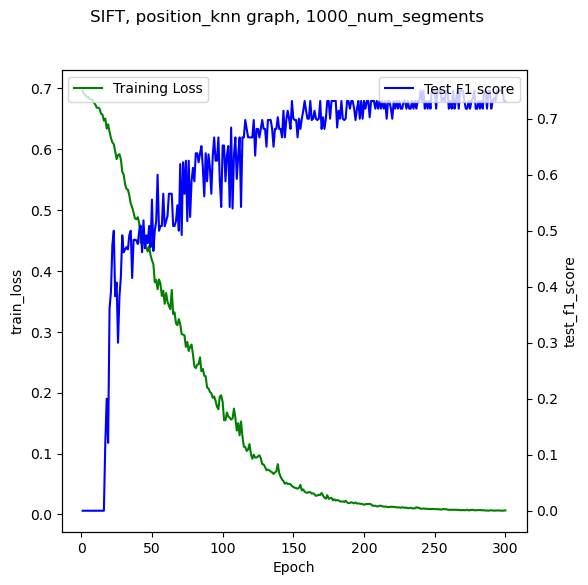

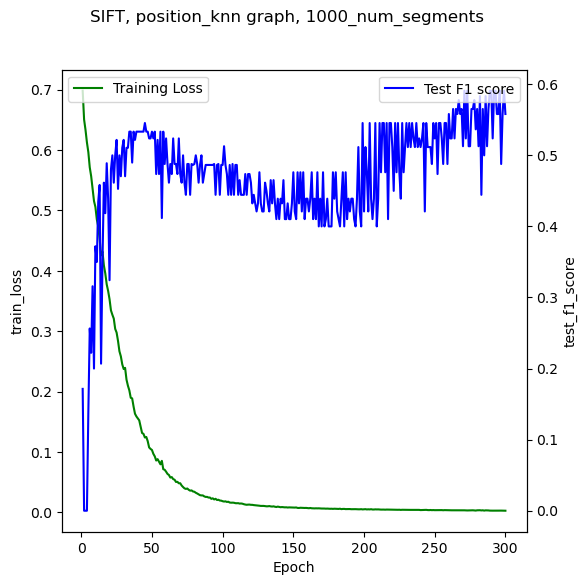

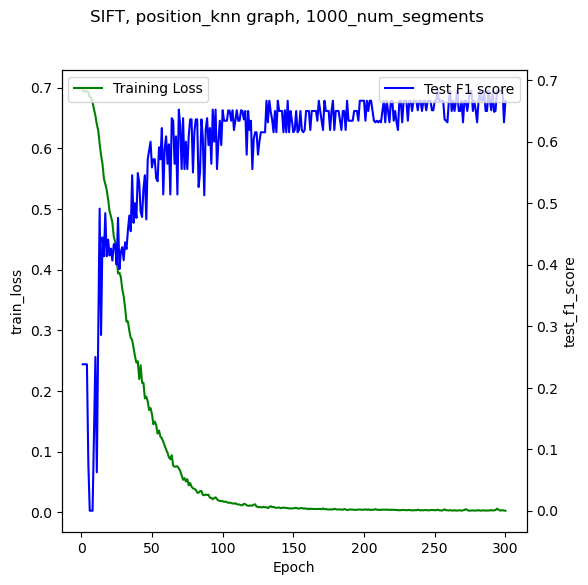

In [13]:
visualize_training_stats("SIFT", "position_knn", "mean", 1000)
visualize_training_stats("SIFT", "position_knn", "max", 1000)
visualize_training_stats("SIFT", "position_knn", "sag", 1000)

Test F1 score is: 0.8292682926829269
Test F1 score is: 0.5517241379310346
Test F1 score is: 0.8235294117647058


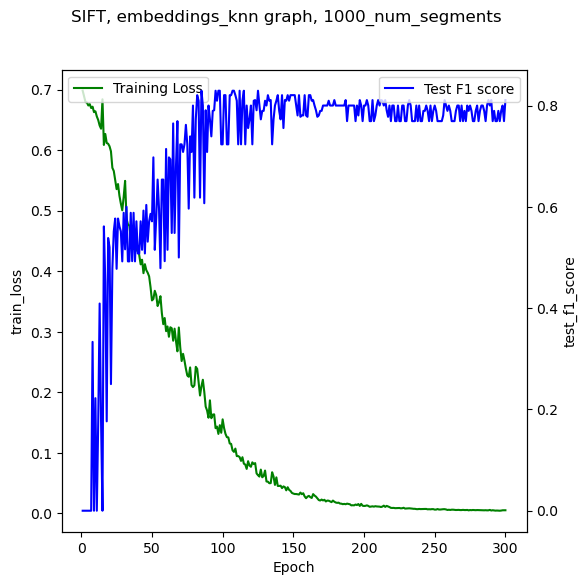

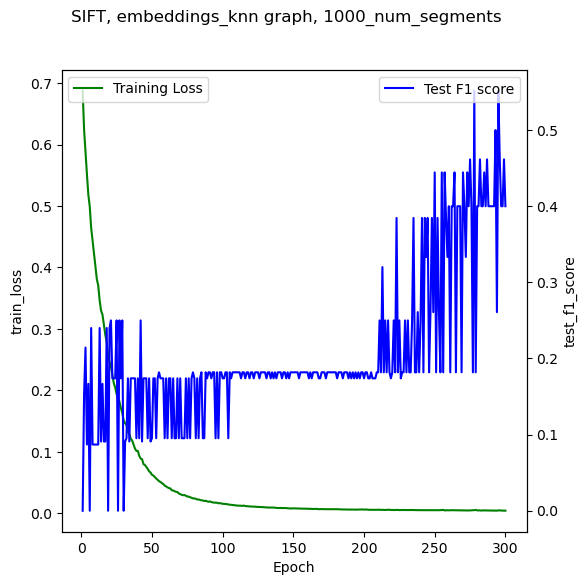

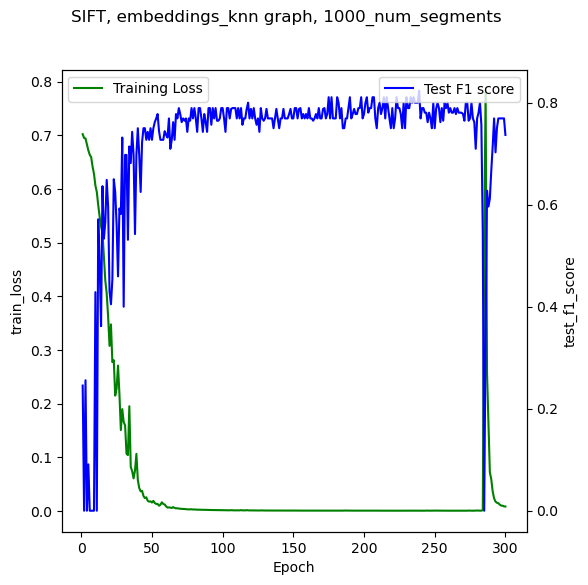

In [12]:
visualize_training_stats("SIFT", "embeddings_knn", "mean", 1000)
visualize_training_stats("SIFT", "embeddings_knn", "max", 1000)
visualize_training_stats("SIFT", "embeddings_knn", "sag", 1000)

Test F1 score is: 0.6829268292682926


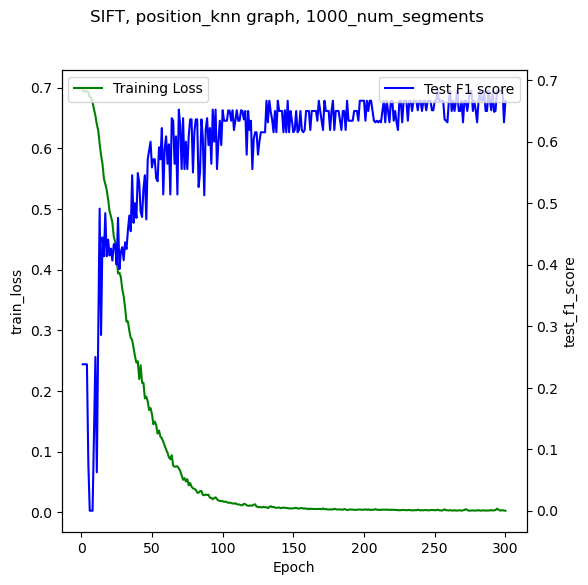

In [9]:
visualize_training_stats("SIFT", "position_knn", "sag", 1000)

In [ ]:
visualize_training_stats("SLIC", "embeddings_knn", 100)
visualize_training_stats("SLIC", "position_knn", 100)
visualize_training_stats("SLIC", "embeddings_knn", 500)
visualize_training_stats("SLIC", "position_knn", 500)
visualize_training_stats("SLIC", "position_knn", 1000)
visualize_training_stats("SLIC", "embeddings_knn", 1000)